In [31]:
import zipfile
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,MaxPooling2D,Flatten,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory='/kaggle/input/catsvsdogs/CATS_DOGS/CATS_DOGS/train',
    target_size=(155, 155),
    batch_size=32,
    class_mode='categorical'
)

Found 18743 images belonging to 2 classes.


In [22]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape=(155,155,3))),
model.add(MaxPooling2D(2,2)),
model.add(Conv2D(64,(3,3),padding='valid',activation='relu')),
model.add(MaxPooling2D(2,2)),
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 153, 153, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 76, 76, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │       5,607,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,627,010 (21.47 MB)

 Trainable params: 5,627,010 (21.47 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(train_generator,epochs=10)

Epoch 1/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 91s 146ms/step - accuracy: 0.6214 - loss: 0.7641
Epoch 2/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.7478 - loss: 0.5134
Epoch 3/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.8275 - loss: 0.3776
Epoch 4/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.9023 - loss: 0.2399
Epoch 5/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - accuracy: 0.9609 - loss: 0.1141
Epoch 6/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.9850 - loss: 0.0479
Epoch 7/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.9904 - loss: 0.0322
Epoch 8/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.9906 - loss: 0.0329
Epoch 9/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.9958 - loss: 0.0150
Epoch 10/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.9951 - loss: 0.0188


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
The cat image is predicted to be: The given image is cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The dog image is predicted to be: The given image is dog


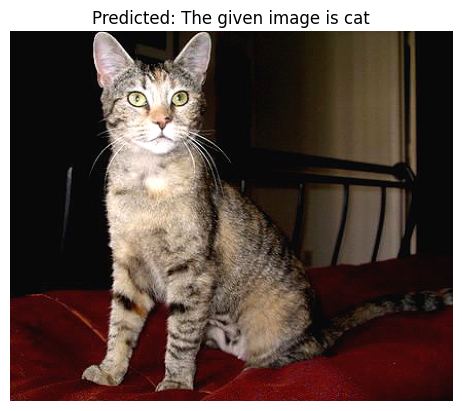

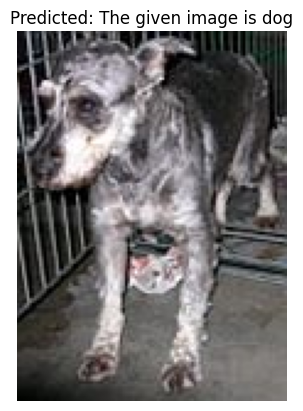

In [34]:
def predict_image(image_path):
    
    img = load_img(image_path, target_size=(155, 155))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0  


    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])  

    
    class_labels = ['cat', 'dog']
    pred= class_labels[class_index]
    return f'The given image is {pred}'


cat_image_path = '/kaggle/input/catsvsdogs/CATS_DOGS/CATS_DOGS/test/CAT/10000.jpg'
dog_image_path = '/kaggle/input/catsvsdogs/CATS_DOGS/CATS_DOGS/test/DOG/10001.jpg'


#predicted_label_cat = predict_image(cat_image_path)
#print(f'The cat image is predicted to be: {predicted_label_cat}')

#predicted_label_dog = predict_image(dog_image_path)
#print(f'The dog image is predicted to be: {predicted_label_dog}')


cat_img = load_img(cat_image_path)
plt.imshow(cat_img)
plt.title(f'Predicted: {predicted_label_cat}')
plt.axis('off')
plt.show()


dog_img = load_img(dog_image_path)
plt.imshow(dog_img)
plt.title(f'Predicted: {predicted_label_dog}')
plt.axis('off')
plt.show()

